In [350]:
# Edwin Peter
# epeter@itam.mx
# 177019

# Importing the libraries
import random as rand
from sklearn.cross_validation import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Importing the dataset
dataset = pd.read_csv('regLinPoli.csv')
X = dataset[dataset.columns[0:-1]]
Y = dataset[dataset.columns[-1]]


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.75)


In [351]:
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

mean = np.mean(Y_train)
sd = np.std(Y_train)
Y_train = (Y_train-mean)/sd
Y_test = (Y_test-mean)/sd

Y_train = np.array(Y_train)
Y_test = np.array(Y_test)


In [352]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

Y_pred = regressor.predict(X_test)

print(regressor.intercept_, regressor.coef_)

(6.2152158993230291e-16, array([ -2.40689879e-03,   1.00190842e+00,   4.94237414e-04,
        -1.90348656e-04,   1.09146540e-04]))


In [353]:
def computeError(w, X, Y):
    error = np.mean((np.transpose(Y) - X.dot(w))**2)
    return error

def regularization(w, iterations, regularization_parameter, learning_rate, X, Y):
    for i in range(iterations):
        for j in range(len(X)):
            learning_parameters = learning_rate * (Y[j] - (X[j].dot(w))) * X[j]
            regularization = regularization_parameter * X[j]
            w += (learning_parameters - regularization)
    return w

In [354]:
w = [rand.random() for i in range(len(X_train[0] + 1))]

learning_rate = 0.01
regularization_parameter = 0
iterations = 5

reg_0 = regularization(w, iterations, regularization_parameter, learning_rate, X_train, Y_train)
error_0 = computeError(reg_0, X_test, Y_test)
print reg_0
print error_0

[  9.80248259e-02   9.20030780e-01  -2.56105380e-02  -1.17218468e-04
   2.67523932e-03]
0.000352841500941


In [355]:
regularization_parameter = 0.1
reg_01 = regularization(w, iterations, regularization_parameter, learning_rate, X_train, Y_train)
error_01 = computeError(reg_01, X_test, Y_test)
print reg_01
print error_01

[-0.14387591  1.64470909  1.36556232  0.07168393 -0.47671282]
2.52154784361


In [356]:
regularization_parameter = 10
reg_10 = regularization(w, iterations, regularization_parameter, learning_rate, X_train, Y_train)
error_10 = computeError(reg_10, X_test, Y_test)

print reg_10
print error_10

[ -24.09204836   73.38786206  139.09167528    7.17999785  -47.9361303 ]
25259.5713251


In [359]:
regs = np.linspace(0, 0.5, 100)
errors = []
for i in regs:
    w = regularization(w, iterations, i, learning_rate, X_train, Y_train)
    errors.append(computeError(w, X_train, Y_train))

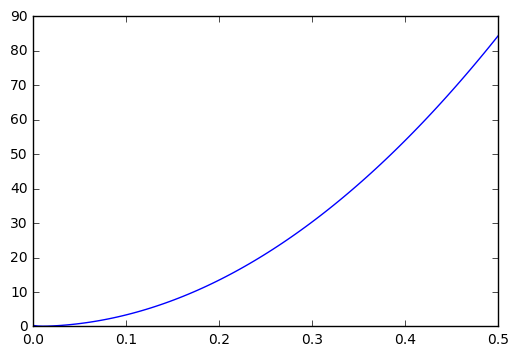

In [360]:
plt.plot(regs, errors)
plt.show()